<a href="https://colab.research.google.com/github/Sergius-DS/elecciOn_datasets/blob/main/diabetes_EDA_Limpieza_29_Nov2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SET DIABETES

## FUNCIONES

Crear funciones para luego llamarlas desde un archivo aparte como cuando uno llama import pandas o from sklearn import (algo), así se ve más estético el notebook en Colab

In [1]:
%%writefile funciones.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# crear funcion para transformar columnas en valores binarios
def categorizar_columnas(df, columnas):
    for columna in columnas:
        df[columna] = df[columna].apply(lambda x: 1 if x == 'SI' else 0).astype(int)
    return df[columnas].head()



# FUNCIÓN PARA VERFICAR FILAS

def verifica_consistencia_filas(df):

    """
    Comprueba si el contenido de las filas coincide con la descripción de dtypes del DataFrame.

    Args:
    df (pd.DataFrame): El DataFrame que se va a comprobar.

    Lo que será Retornado:
    pd.DataFrame: Un DataFrame con valores booleanos que indican si los valores de cada
    fila son coherentes con los tipos de datos de la columna.
    True indica coherencia, False indica incoherencia.
    """

    # Crea un Data Frame vacío para guardar los resultados
    result_df = pd.DataFrame(index=df.index, columns=df.columns, dtype=bool)

    # Recorre cada columna y fila para revisar consistencia
    for col in df.columns:
        # Verifica si el tipo de dato es numéric0 (int o float)
        is_numeric = pd.api.types.is_numeric_dtype(df[col].dtype)

        # Verifica la consistencia de cada fila en la columna actual
        if is_numeric:
            result_df[col] = pd.to_numeric(df[col], errors='coerce').notna()
        else:
            # Verifica que los datos son del tipo string, object
            result_df[col] = df[col] == df[col].astype('object')

    return result_df

# crear funcion para transformar columna a fecha
def columnas_a_fecha(df, columnas):
    for columna in columnas:
        df[columna] = pd.to_datetime(df[columna], format='%Y%m%d', errors='coerce')
    return df[columnas].head()

# Crear función para ver la frecuencia y porcentaje de los valores únicos de cada columna categórica
def valores_unicos(df, c: str):
    """
    Función para ver la frecuencia y porcentaje de los valores únicos de cada columna categórica
    """
    # Contar las frecuencias de los valores únicos
    frecuencias = df[c].dropna().value_counts()

    # Calcular el porcentaje para cada valor único
    total = frecuencias.sum()
    porcentajes = (frecuencias / total) * 100

    # Mostrar los valores únicos, sus frecuencias y porcentajes
    resultado = pd.DataFrame({
        'Frecuencia': frecuencias,
        'Porcentaje': porcentajes,
    })
    # Formatear la columna de porcentaje
    resultado['Porcentaje'] = resultado['Porcentaje'].map(lambda x: f"{x:.2f}%")

    print(resultado)

# Función para crear aplicar get dummies a variables categóricas
def dummies(df, column_name):
    """
    Crea variables Dummies a partir de una columna categórica
    Borra columna original
    Concatena las variables dummies al DataFrame original

    Ejemplo de uso:
    df = apply_get_dummies(df, 'Nombre_columna')
    """
    dummy = pd.get_dummies(df[column_name])
    df = df.drop(columns=[column_name])
    return pd.concat([df, dummy], axis=1)


def v_count_por_columna(df, columnas):
  # Iterar sobre cada columna categórica e imprimir value_counts()
  for col in columnas:
      print(f"Value counts for {col}:")
      print(ds[col].value_counts())
      print("\n")


def plot_categorical_columns_topn(df, column_names, top_n=10):
    """
    Plots the distribution of multiple categorical columns showing top N categories.

    Args:
        df: The pandas DataFrame containing the data.
        column_names: A list or Index of column names to plot.
        top_n: Number of top categories to display; others are grouped as 'Other'.
    """
    for column_name in column_names:
        num_unique = df[column_name].nunique()

        if num_unique > 15:
            print(f"Skipping column '{column_name}' due to high cardinality ({num_unique} categories).")
            continue  # Skip plotting for this column
            counts = df[column_name].value_counts()
            top_counts = counts.nlargest(top_n)
            other_count = counts.sum() - top_counts.sum()
            top_counts['Other'] = other_count
            num_unique = top_counts.size
        else:
            top_counts = df[column_name].value_counts()

        if num_unique <= 15:
            # Proceed with plotting as before
            if num_unique > 2:
                fig, ax = plt.subplots(figsize=(10, max(6, num_unique * 0.5)))
                ax.barh(top_counts.index, top_counts.values)
                ax.set_xlabel('Count')
                ax.set_ylabel(column_name)
                ax.set_title(f'Distribution of {column_name}')

                for i, v in enumerate(top_counts.values):
                    ax.text(v + max(top_counts.values)*0.01, i, str(v), va='center')
            else:
                fig, ax = plt.subplots(figsize=(10, 6))
                ax.bar(top_counts.index, top_counts.values)
                ax.set_xlabel(column_name)
                ax.set_ylabel('Count')
                ax.set_title(f'Distribution of {column_name}')

                for i, v in enumerate(top_counts.values):
                    ax.text(i, v + max(top_counts.values)*0.01, str(v), ha='center')

            plt.tight_layout()
            plt.show()

            print("\n" + "-"*40 + "\n")
        else:
            print(f"Skipping column '{column_name}' as it has more than 15 categories even after grouping.")


def plot_numerical_columns_histograma(df, column_names):
    for column_name in column_names:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(df[column_name], kde=True, ax=ax)
        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {column_name}')
        plt.tight_layout()
        plt.show()
        #print("\n" + "-"*40 + "\n")


def plot_numerical_columns_vcount(df, column_names):
    for column_name in column_names:
        fig, ax = plt.subplots(figsize=(10, 6))
        value_counts = df[column_name].value_counts()
        value_counts.plot(kind='bar', ax=ax)

        # Annotate each bar with its value
        for p in ax.patches:
            ax.annotate(str(p.get_height()),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {column_name}')
        plt.tight_layout()
        plt.show()
        #print("\n" + "-"*40 + "\n")



Overwriting funciones.py


# EDA

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# llamar las funciones creadas también se puede from funciones import *
#from funciones import categorizar_columnas, verifica_consistencia_filas
from funciones import *
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
ds = pd.read_csv('data_diabetes_limpio.csv')

In [4]:
ds.head()

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO
0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,MASCULINO,2018-01-05,Diabetes mellitus tipo 2,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15,2018
1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,MASCULINO,2018-08-09,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69,2018
2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,FEMENINO,2018-02-09,Diabetes mellitus tipo 2,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50,2018
3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,FEMENINO,2023-01-17,Diabetes mellitus tipo 2,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08,2023
4,2023-03-31,0000AD2FC5F5176DF573CE912D47FB0E1AF58917E81C64...,78,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,FEMENINO,2021-11-26,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,CAJAMARCA-CAJAMARCA-CAJAMARCA,-7.15,-78.51,2021


In [5]:
ds.shape

(623867, 23)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FECHA_AFILIADOS_SIS   623867 non-null  object 
 1   CODIGO_ANONIMIZADO    623867 non-null  object 
 2   EDAD                  623867 non-null  int64  
 3   UBIGEO                623867 non-null  int64  
 4   DEPARTAMENTO          623867 non-null  object 
 5   PROVINCIA             623867 non-null  object 
 6   DISTRITO              623867 non-null  object 
 7   SEXO                  623867 non-null  object 
 8   FECHA_PRIMER_DX       623867 non-null  object 
 9   TIPO_DIABETES         623867 non-null  object 
 10  CON_DX_OBESIDAD       623867 non-null  int64  
 11  CON_DX_HIPERTENSION   623867 non-null  int64  
 12  CON_DX_SALUDMENTAL    623867 non-null  int64  
 13  CANT_ATENCIONES       623867 non-null  int64  
 14  VALOR_NETO            623867 non-null  float64
 15  

In [7]:
categorical = ds.select_dtypes(include='object').columns

In [8]:
numerical = ds.select_dtypes(exclude='object').columns

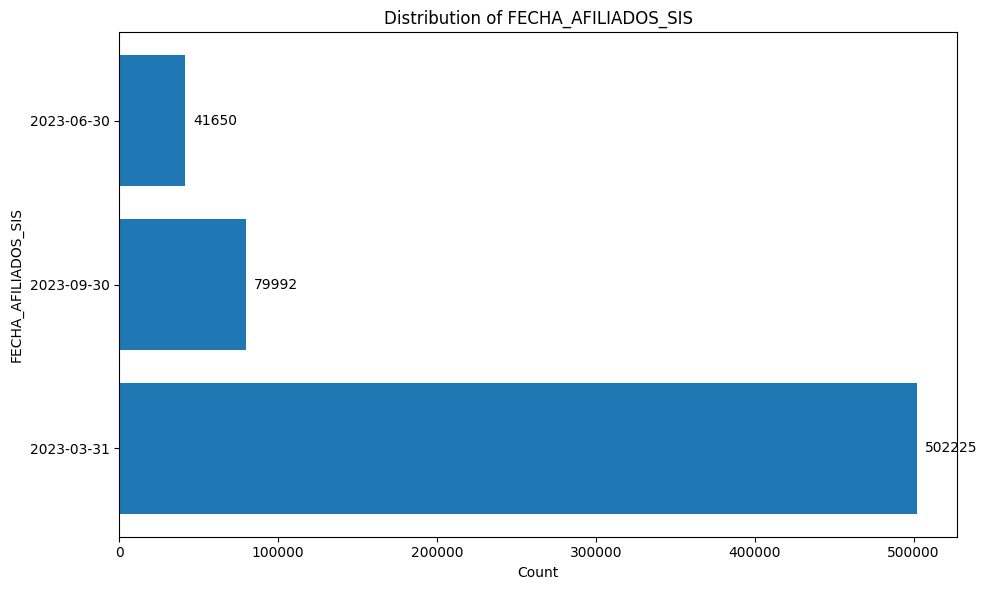


----------------------------------------

Skipping column 'CODIGO_ANONIMIZADO' due to high cardinality (623867 categories).
Skipping column 'DEPARTAMENTO' due to high cardinality (25 categories).
Skipping column 'PROVINCIA' due to high cardinality (196 categories).
Skipping column 'DISTRITO' due to high cardinality (1708 categories).


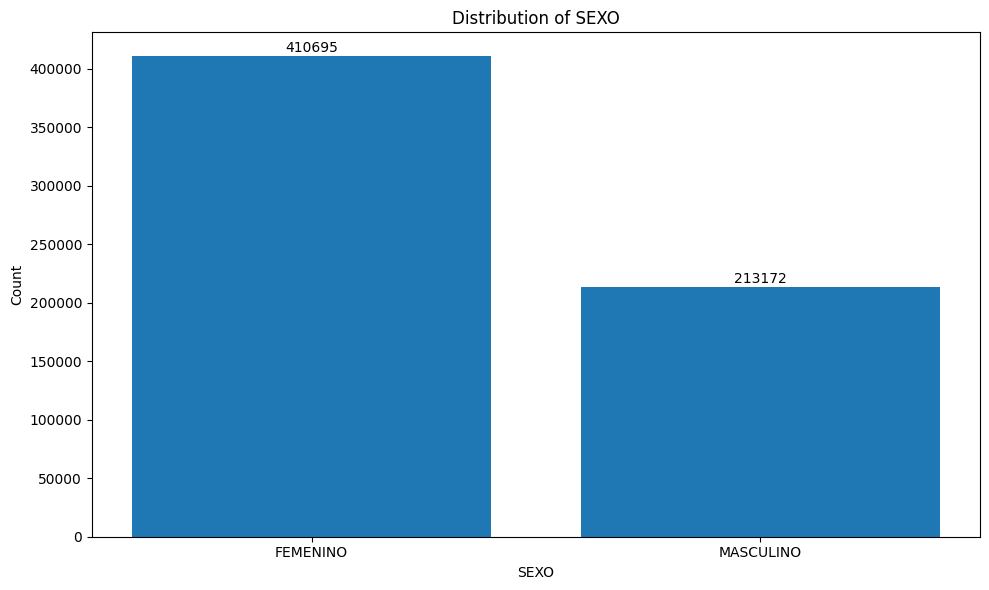


----------------------------------------

Skipping column 'FECHA_PRIMER_DX' due to high cardinality (2099 categories).


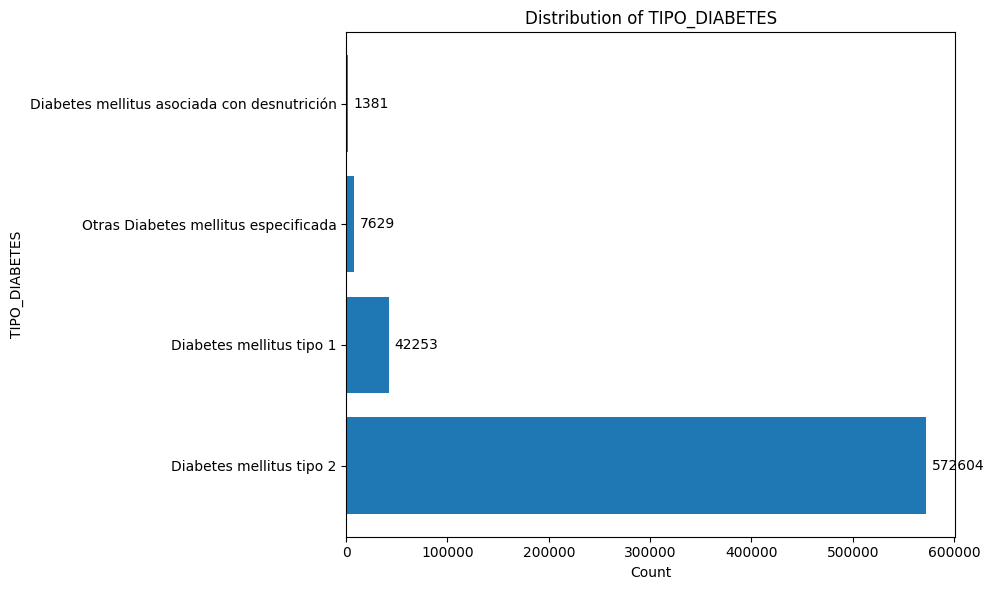


----------------------------------------

Skipping column 'UBICACION' due to high cardinality (1861 categories).


In [9]:
plot_categorical_columns_topn(ds, categorical)

In [10]:
numerical

Index(['EDAD', 'UBIGEO', 'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION',
       'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES', 'VALOR_NETO',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'HOSPITALIZADO',
       'latitud', 'longitud', 'AÑO'],
      dtype='object')

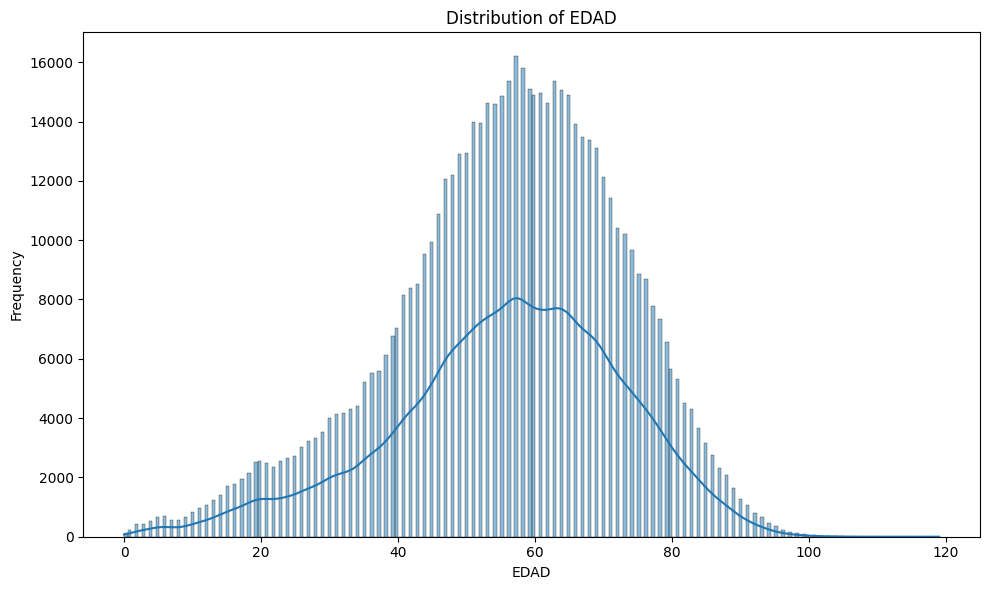

In [11]:
plot_numerical_columns_histograma(ds, ['EDAD'])

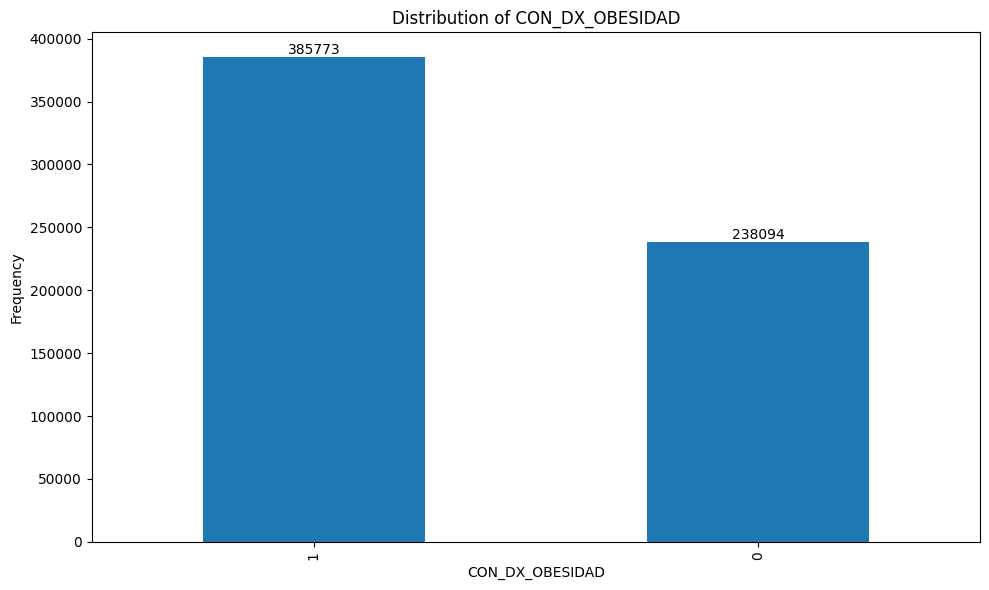

In [12]:
plot_numerical_columns_vcount(ds, ['CON_DX_OBESIDAD'] )

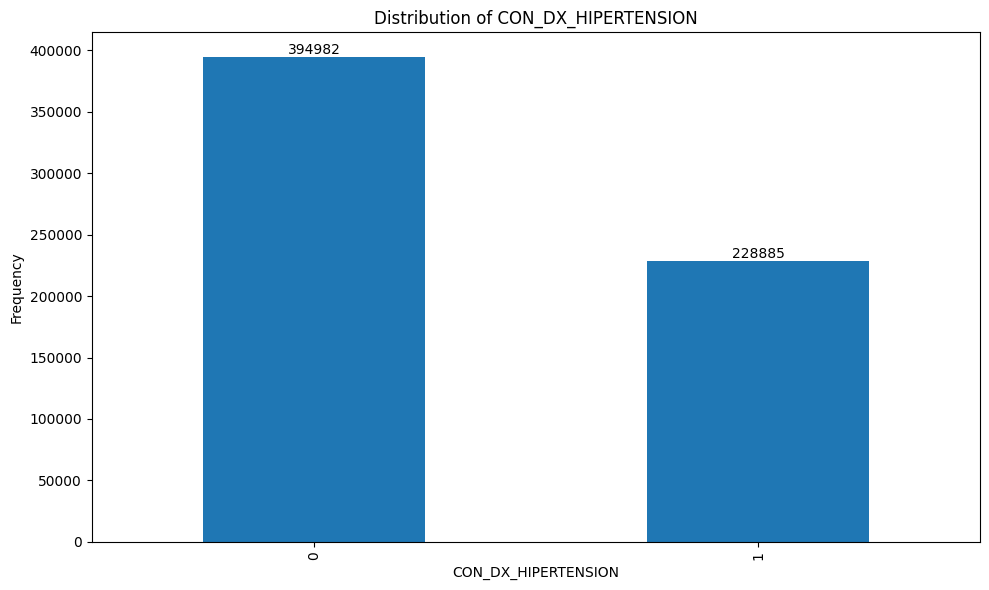

In [13]:
 plot_numerical_columns_vcount(ds,['CON_DX_HIPERTENSION'])

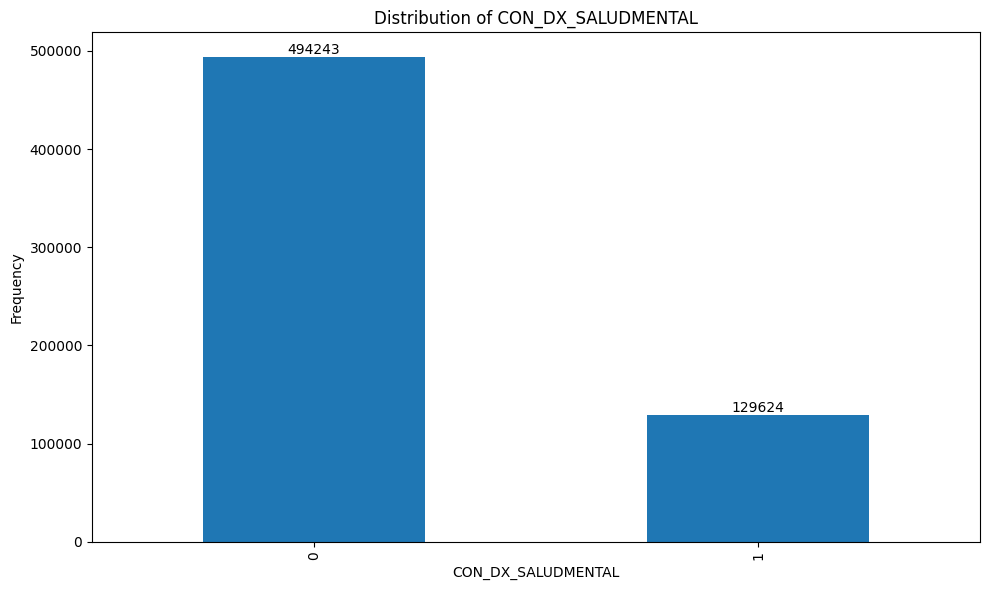

In [14]:
plot_numerical_columns_vcount(ds,['CON_DX_SALUDMENTAL'])

In [15]:
ds['VALOR_NETO_HOSP'].nunique()

15139

In [16]:
valor_neto_hosp_sin_cero = ds[ds['VALOR_NETO_HOSP'] > 1]

In [17]:
valor_neto_hosp_sin_cero['VALOR_NETO_HOSP'].describe()

,VALOR_NETO_HOSP
count,15454.00
mean,3058.42
std,6758.07
min,1.17
25%,679.06
50%,1370.16
75%,2909.76
max,232695.27


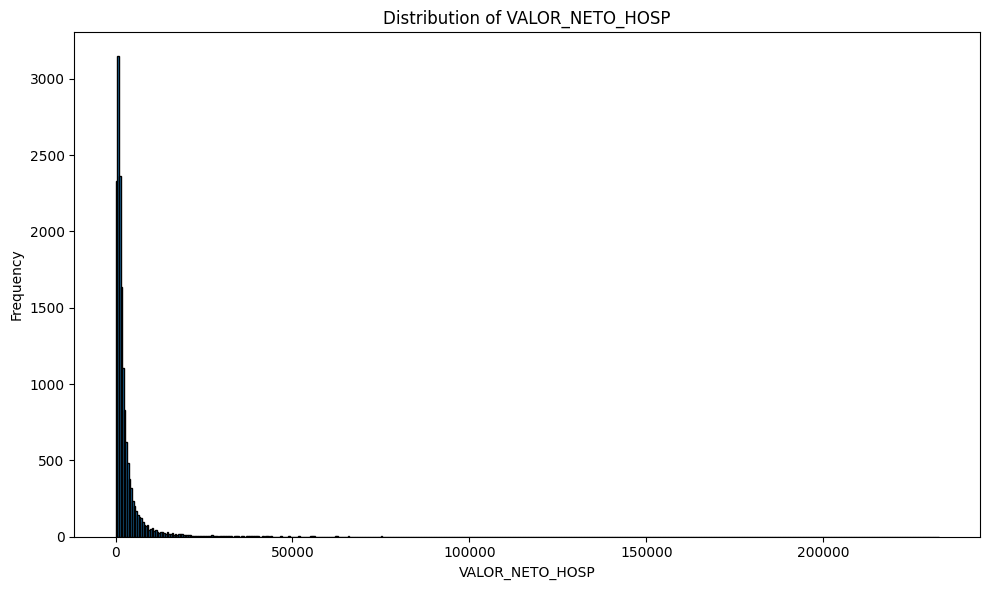

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP'], bins=500, edgecolor='black')
plt.xlabel('VALOR_NETO_HOSP')
plt.ylabel('Frequency')
plt.title('Distribution of VALOR_NETO_HOSP')
plt.tight_layout()
plt.show()

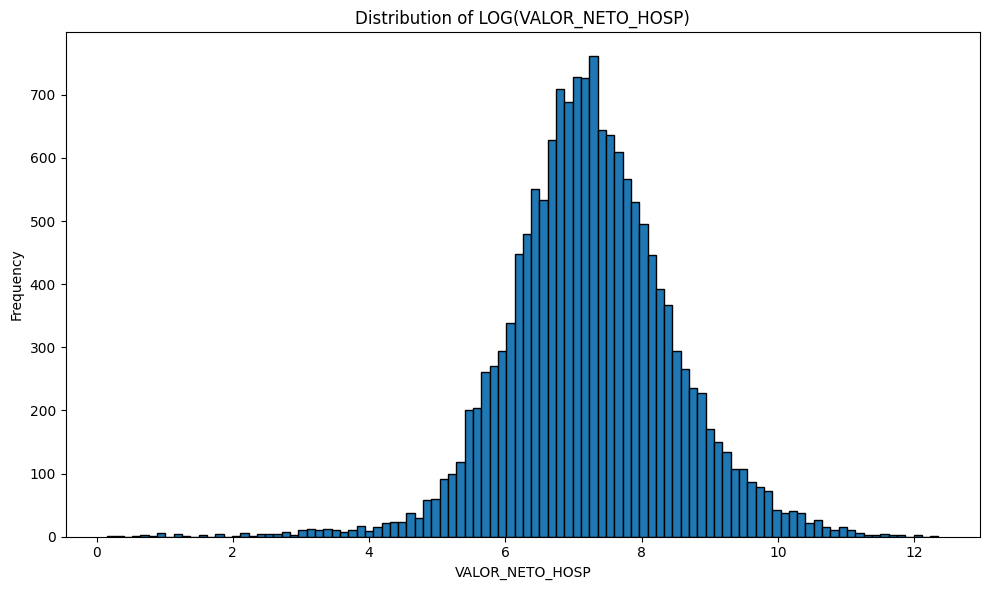

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP']), bins=100, edgecolor='black')
plt.xlabel('VALOR_NETO_HOSP')
plt.ylabel('Frequency')
plt.title('Distribution of LOG(VALOR_NETO_HOSP)')
plt.tight_layout()
plt.show()

In [20]:
ds['VALOR_NETO'].nunique()

40924

In [21]:
valor_neto_sin_cero = ds[ds['VALOR_NETO'] > 1]

In [22]:
valor_neto_sin_cero['VALOR_NETO'].describe()

,VALOR_NETO
count,171941.00
mean,335.13
std,2215.81
min,1.01
25%,5.40
50%,17.64
75%,107.71
max,232695.27


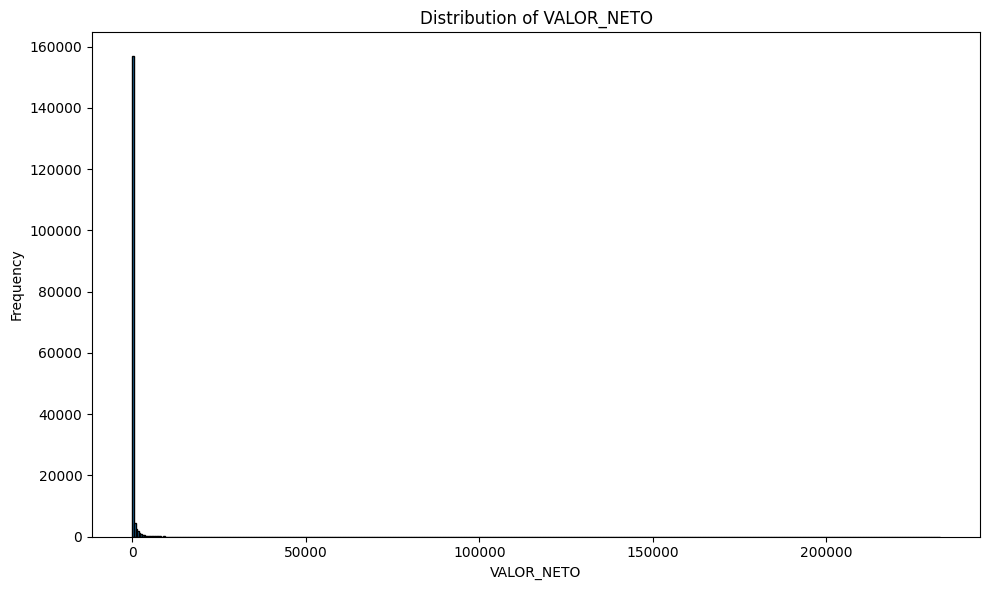

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(valor_neto_sin_cero['VALOR_NETO'], bins=500, edgecolor='black')
plt.xlabel('VALOR_NETO')
plt.ylabel('Frequency')
plt.title('Distribution of VALOR_NETO')
plt.tight_layout()
plt.show()

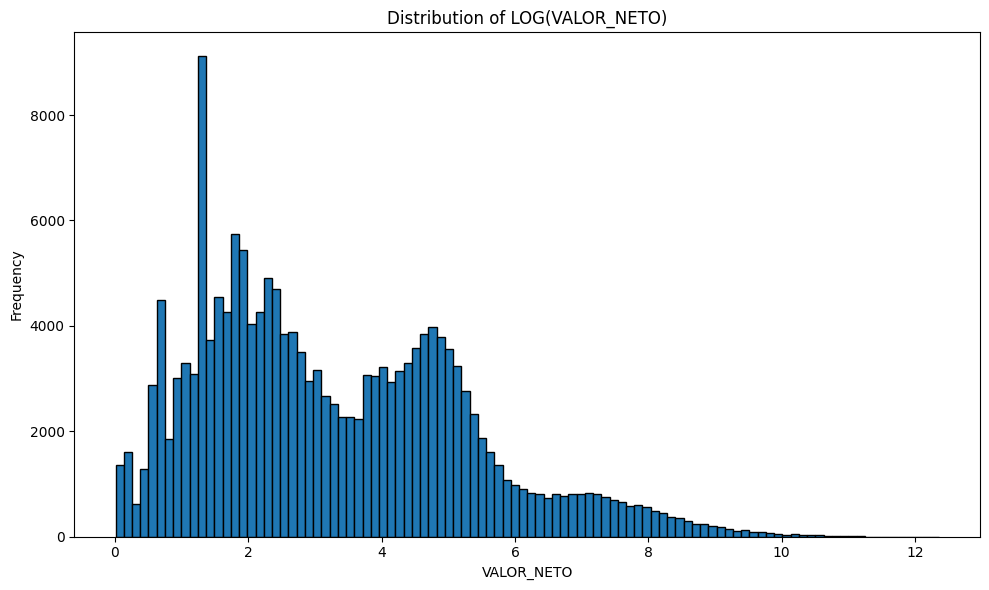

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(valor_neto_sin_cero['VALOR_NETO']), bins=100, edgecolor='black')
plt.xlabel('VALOR_NETO')
plt.ylabel('Frequency')
plt.title('Distribution of LOG(VALOR_NETO)')
plt.tight_layout()
plt.show()

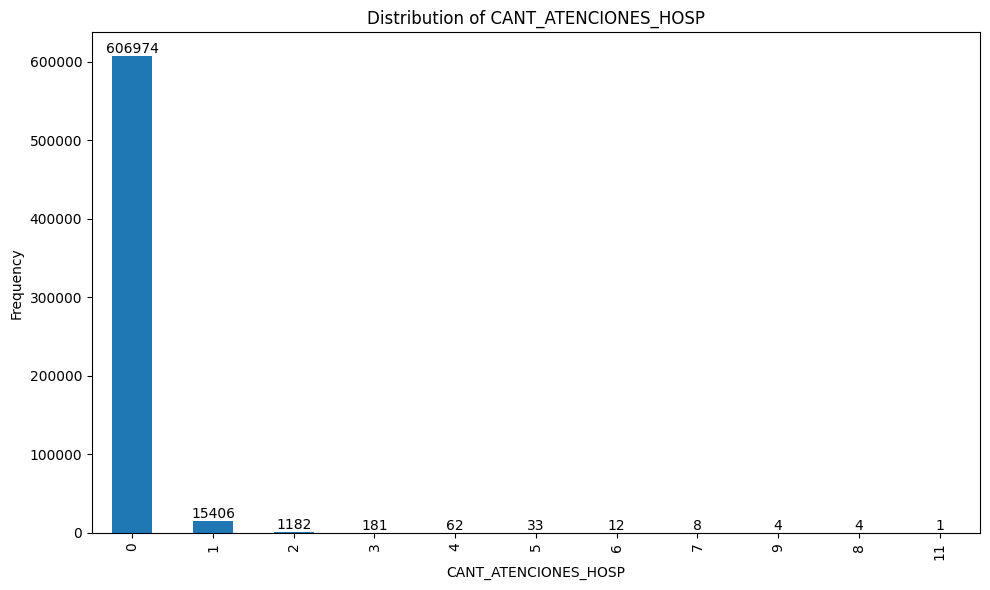

In [25]:
plot_numerical_columns_vcount(ds,['CANT_ATENCIONES_HOSP'])

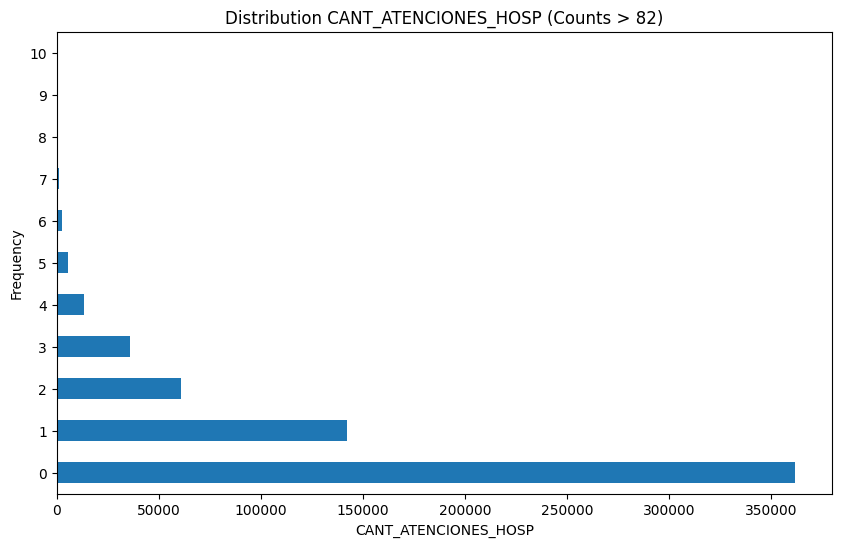

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
# Calculate value counts and filter
value_counts = ds['CANT_ATENCIONES'].value_counts()
filtered_values = value_counts[value_counts > 82]

# Filter the original DataFrame using the index of filtered values
filtered_ds = ds[ds['CANT_ATENCIONES'].isin(filtered_values.index)]

# Now plot the filtered DataFrame
filtered_ds['CANT_ATENCIONES'].value_counts().plot(kind='barh', ax=ax)
plt.xlabel('CANT_ATENCIONES_HOSP')
plt.ylabel('Frequency') # Corrected ylabel to reflect frequency
plt.title('Distribution CANT_ATENCIONES_HOSP (Counts > 82)') # Added clarity to the title
plt.show()

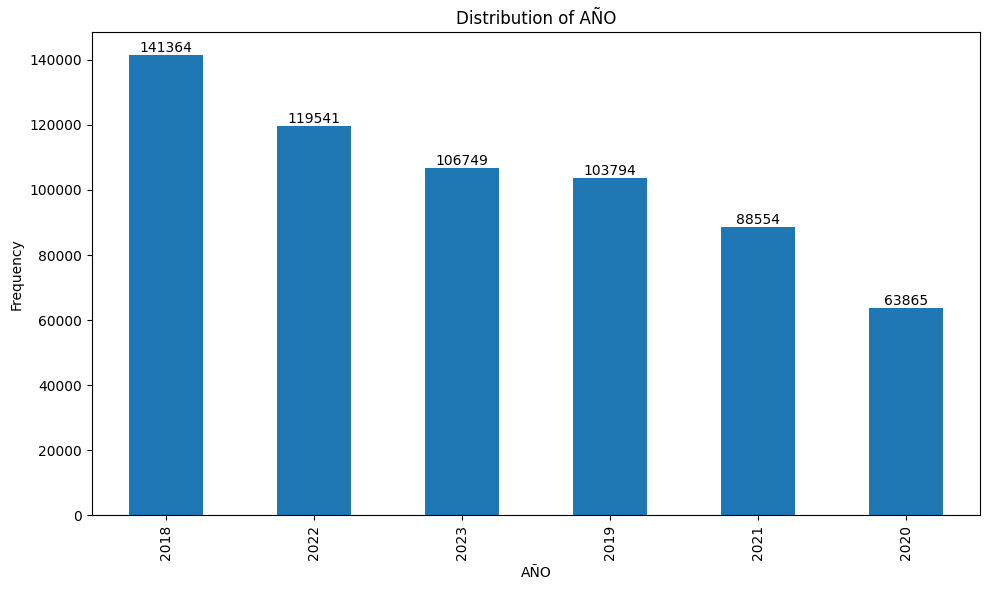

In [54]:
plot_numerical_columns_vcount(ds,['AÑO'])

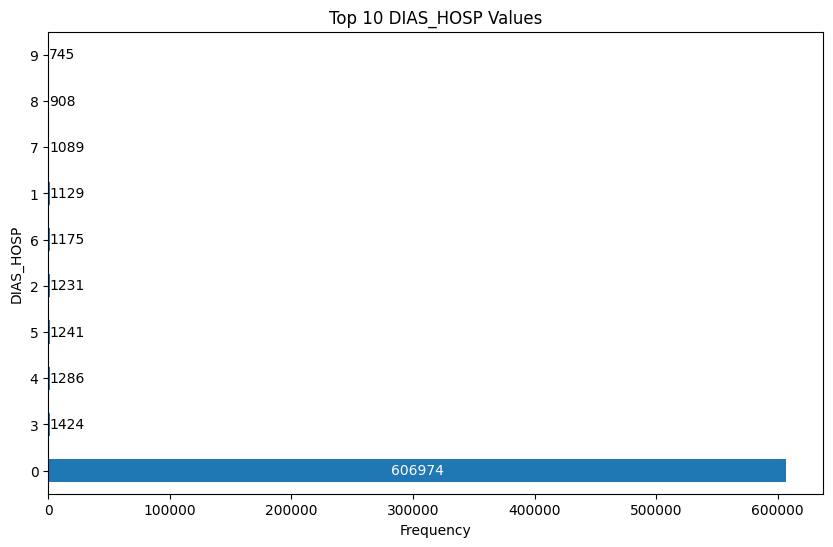

In [66]:
# Calculate value counts and filter
cuenta_dias_hosp = ds['DIAS_HOSP'].value_counts()

# Get the top 10 most frequent values
top_10_values = cuenta_dias_hosp.nlargest(10)  # Use `10` instead of `9` to get top 10

# Filter the original DataFrame using the index of top 10 values
filtered_ds = ds[ds['DIAS_HOSP'].isin(top_10_values.index)]

# Now plot the filtered DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
bars = filtered_ds['DIAS_HOSP'].value_counts().plot(kind='barh', ax=ax)

# Add value labels to each bar
for bar in ax.patches:
    # Get the width (value) and the y-coordinate of the bar
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    # If the value is greater than 600,000, place the label inside the bar
    if value > 600000:
        ax.text(value / 2, y, f'{int(value)}', ha='center', va='center', color='white')
    else:
        ax.text(value, y, f'{int(value)}', va='center')

plt.xlabel('Frequency')
plt.ylabel('DIAS_HOSP')
plt.title('Top 10 DIAS_HOSP Values')
plt.show()

In [58]:
ds['DIAS_HOSP'].value_counts().head(20)

,count
DIAS_HOSP,
0,606974
3,1424
4,1286
5,1241
2,1231
6,1175
1,1129
7,1089
8,908


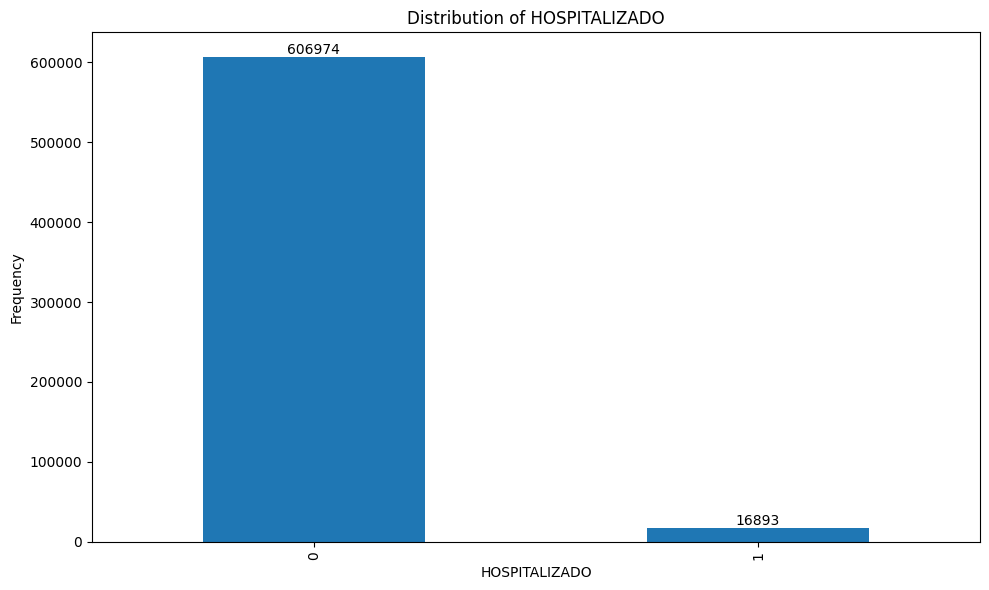

In [56]:
plot_numerical_columns_vcount(ds,['HOSPITALIZADO'])

OBSERVACIONES:

'VALOR_NETO_HOSP' Y 'VALOR_NETO' con valores entre 0 y 1: 0.24, 0.66, etc.

Lo que es menor que uno MAPEARLO y dejarlo como CERO?

Transformé 'VALOR_NETO_HOSP' Y 'VALOR_NETO' temporalmente para vizualizarlas de una forma parecida a una distribución normal